Machine Learning Classification with the Iris Dataset
===========================================

In this project, we use three different classification methods with the scikit-learn iris dataset. With each method, we use ten-fold cross-validation and generate a confusion matrix to determine the most accurate classifier for this dataset.

First we import some standard libraries, along with the scikit-learn libraries for the dataset and classifiers.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import datasets, metrics, tree
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Next, we load our data. The iris dataset as categories for sepal length, sepal width, petal length, and petal length, measured in centimetres. Here, we will use sepal length and width, which are the first two columns in the data.

In [53]:
# load data
iris = datasets.load_iris()
x = iris.data[:, 0] # sepal length
y = iris.data[:, 1] # sepal width
data = iris.data[:, :2]
classes = iris.target

# display data to be used
print('ID' + '\t' + 'Sepal Length' + '\t' + 'Sepal Width' + '\t' + 'Class'.rjust(10))
for i in range(len(data)):
    print(str(i).rjust(3) + '\t' + str(data[i][0]).rjust(11) + '\t' + str(data[i][1]).rjust(11) + '\t' + str(iris.target_names[classes[i]]).rjust(10))

ID	Sepal Length	Sepal Width	     Class
  0	        5.1	        3.5	    setosa
  1	        4.9	        3.0	    setosa
  2	        4.7	        3.2	    setosa
  3	        4.6	        3.1	    setosa
  4	        5.0	        3.6	    setosa
  5	        5.4	        3.9	    setosa
  6	        4.6	        3.4	    setosa
  7	        5.0	        3.4	    setosa
  8	        4.4	        2.9	    setosa
  9	        4.9	        3.1	    setosa
 10	        5.4	        3.7	    setosa
 11	        4.8	        3.4	    setosa
 12	        4.8	        3.0	    setosa
 13	        4.3	        3.0	    setosa
 14	        5.8	        4.0	    setosa
 15	        5.7	        4.4	    setosa
 16	        5.4	        3.9	    setosa
 17	        5.1	        3.5	    setosa
 18	        5.7	        3.8	    setosa
 19	        5.1	        3.8	    setosa
 20	        5.4	        3.4	    setosa
 21	        5.1	        3.7	    setosa
 22	        4.6	        3.6	    setosa
 23	        5.1	        3.3	    setosa
 24	        4.8	        3

Here, we will make a scatter plot of the data; the cyan points represent iris setosa, the magenta ones represent iris versicolor, and the yellow ones are for iris virginica.

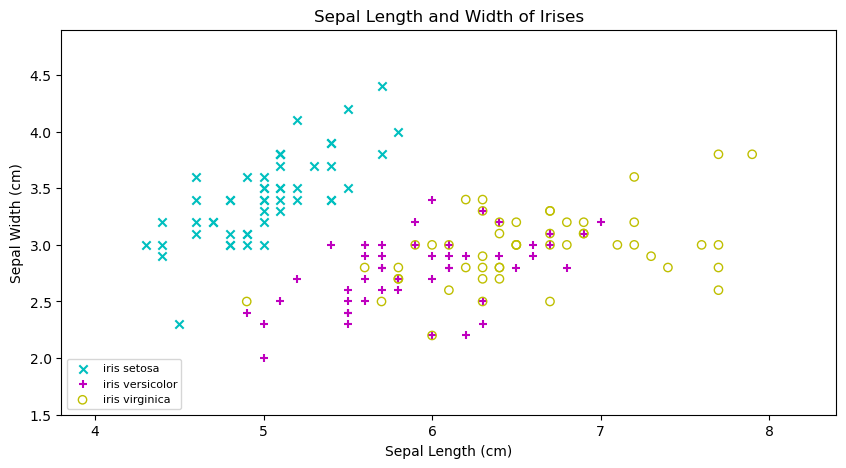

In [54]:
# create scatter plot of data
x_min, x_max = x.min() - 0.5, x.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

plt.figure(figsize=(10,5))
plt.clf()

filled = [True, True, False]
colours = ['c', 'm', 'y']
markers = ['x', '+', 'o']

setosa = plt.scatter(x=x[np.nonzero(classes==0)], y=y[np.nonzero(classes==0)], c=colours[0], marker=markers[0])
versicolor = plt.scatter(x=x[np.nonzero(classes==1)], y=y[np.nonzero(classes==1)], c=colours[1], marker=markers[1])
virginica = plt.scatter(x=x[np.nonzero(classes==2)], y=y[np.nonzero(classes==2)], edgecolors=colours[2], marker=markers[2], facecolors='none')

plt.title("Sepal Length and Width of Irises")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend((setosa, versicolor, virginica), ("iris setosa", "iris versicolor", "iris virginica"),
           loc='lower left',
           ncol=1,
           fontsize=8)

plt.show()

Now we can classify our data. First, we will use the *k*-nearest neighbours algorithm with ten-fold cross-validation and output the resulting confusion matrix.

In [55]:
print("k-Nearest Neighbours:")
kfold = KFold(n_splits=10, shuffle=True)
knc = KNeighborsClassifier(n_neighbors=10)
matrix = [[0 for i in np.unique(classes)] for i in np.unique(classes)]
for train, test in kfold.split(data): # indices of train and test data
    datatrain, datatest = data[train], data[test]
    classtrain, classtest = classes[train], classes[test]
    knc.fit(datatrain, classtrain)
    classpred = knc.predict(datatest)
    confmat = metrics.confusion_matrix(classtest, classpred)
    matrix += confmat

# confusion matrix and accuracy stats
print(matrix)
correct = 0
total = 0
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if i == j:
            correct += matrix[i][j]
        total += matrix[i][j]
print("Accuracy:", round(correct/total, 5))

k-Nearest Neighbours:
[[50  0  0]
 [ 0 36 14]
 [ 1 21 28]]
Accuracy: 0.76


Now we will use our second classifier, using decision trees.

In [56]:
print("Decision Trees:")
kfold = KFold(n_splits=10, shuffle=True)
dtc = tree.DecisionTreeClassifier()
matrix = [[0 for i in np.unique(classes)] for i in np.unique(classes)]
for train, test in kfold.split(data): # indices of train and test data
    datatrain, datatest = data[train], data[test]
    classtrain, classtest = classes[train], classes[test]
    dtc.fit(datatrain, classtrain)
    classpred = dtc.predict(datatest)
    confmat = metrics.confusion_matrix(classtest, classpred)
    matrix += confmat

# confusion matrix and accuracy stats
print(matrix)
correct = 0
total = 0
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if i == j:
            correct += matrix[i][j]
        total += matrix[i][j]
print("Accuracy:", round(correct/total, 5))

Decision Trees:
[[48  1  1]
 [ 2 26 22]
 [ 1 24 25]]
Accuracy: 0.66


Our final classifier will be the Gaussian Naive Bayes classifier.

In [57]:
print("Gaussian Naive Bayes:")
kfold = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
matrix = [[0 for i in np.unique(classes)] for i in np.unique(classes)]
for train, test in kfold.split(data): # indices of train and test data
    datatrain, datatest = data[train], data[test]
    classtrain, classtest = classes[train], classes[test]
    gnb.fit(datatrain, classtrain)
    classpred = dtc.predict(datatest)
    confmat = metrics.confusion_matrix(classtest, classpred)
    matrix += confmat

# confusion matrix and accuracy stats
print(matrix)
correct = 0
total = 0
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if i == j:
            correct += matrix[i][j]
        total += matrix[i][j]
print("Accuracy:", round(correct/total, 5))

Gaussian Naive Bayes:
[[50  0  0]
 [ 0 43  7]
 [ 0  8 42]]
Accuracy: 0.9


Our results yielded the following accuracies:

* **_k_-Nearest Neighbours:** 0.76
* **Decision Trees:** 0.66
* **Gaussian Naive Bayes:** 0.9

Based on this example, the Gaussian Naive Bayes classifier had the highest accuracy when classifying the iris dataset, being the only classifier which correctly classified at least 40 data points in each class, including sorting all of the points for iris setosa correctly, while the decision trees classifier had the lowest accuracy. We can also use other classifiers in a similar way to get more results and determine if there is another classifier that would yield a higher accuracy.